In [216]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [217]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [218]:
# Load data from CSV file
#df = pd.read_excel('/content/drive/MyDrive/PTDLKD/đồ án/ADAUSDT.xlsx')
#df = pd.read_excel('/content/drive/MyDrive/PTDLKD/đồ án/BNBUSDT.xlsx')
df = pd.read_excel('/content/drive/MyDrive/PTDLKD/đồ án/ETHUSDT.xlsx')
# Convert Close time column to date format
df["Close time"] = pd.to_datetime(df["Close time"], format="%d-%m-%Y")
# Sort data by Close time column
df = df.sort_values("Close time")
df = df[['Close','Close time']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Close,Close time
0,134.85,2019-03-22
1,135.98,2019-03-23
2,137.28,2019-03-24
3,136.09,2019-03-25
4,133.98,2019-03-26
...,...,...
1495,1749.57,2023-03-25
1496,1741.88,2023-03-26
1497,1773.88,2023-03-27
1498,1715.22,2023-03-28


In [219]:
# 2. Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
val_size = int(0.1 * len(df))
test_size = len(df) - train_size - val_size

train_data = df[:train_size]
val_data= df[train_size:train_size+val_size]
test_data = df[train_size+val_size:]

In [220]:
from pandas.core.indexers.utils import Any
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train=model.predict(x_train)


In [221]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [222]:
# 6. Tạo tập 30 ngày tiếp theo
df['Close time'] = pd.to_datetime(df['Close time'])  # Chuyển đổi cột 'Close time' thành định dạng ngày tháng hợp lệ
last_index = df['Close time'].index[-1]  # Lấy index của ngày cuối cùng trong cột 'Close time'
last_date = df['Close time'].iloc[-1]  # Lấy ngày cuối cùng trong cột 'Close time'
date_range = pd.date_range(last_date, periods=31, freq='D', closed='right')  # Tạo chuỗi ngày cho 30 ngày tiếp theo

# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[5264.24568549 5268.35181908 5272.45795268 5276.56408628 5280.67021987
 5284.77635347 5288.88248707 5292.98862066 5297.09475426 5301.20088786
 5305.30702145 5309.41315505 5313.51928865 5317.62542224 5321.73155584
 5325.83768944 5329.94382303 5334.04995663 5338.15609023 5342.26222382
 5346.36835742 5350.47449102 5354.58062461 5358.68675821 5362.79289181
 5366.8990254  5371.005159   5375.1112926  5379.21742619 5383.32355979]


<ipython-input-222-a32c3847de7d>:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  date_range = pd.date_range(last_date, periods=31, freq='D', closed='right')  # Tạo chuỗi ngày cho 30 ngày tiếp theo


In [223]:
# 7. Đánh giá độ chính xác validate, test
# Tính RMSE
valid_rmse = mean_squared_error(y_val, y_pred_val,squared=False)
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
# Tính MAE
valid_mae = mean_absolute_error(y_pred_val, y_val)
test_mae = mean_absolute_error(y_pred, y_test)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 1087.3400005808492
Testing RMSE: 3216.3896125371602
Validation MAE: 940.579785235622
Testing MAE: 3193.1336791825743


Validation RMSE: 1087.3400005808492
Testing RMSE: 3216.3896125371602
Validation MAE: 940.579785235622
Testing MAE: 3193.1336791825743


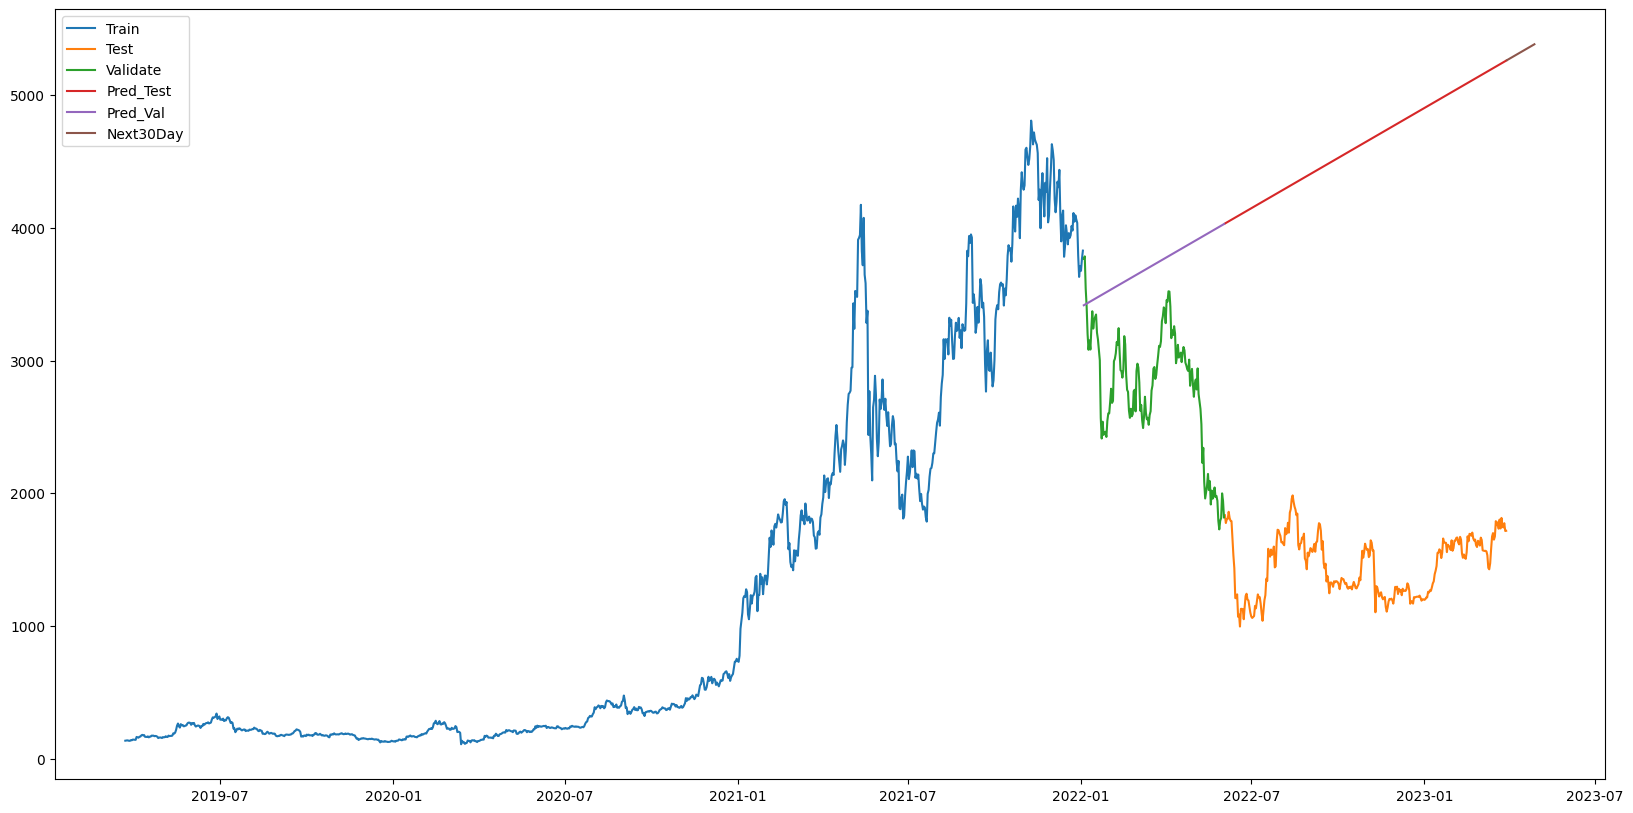

In [224]:
# 8. Tính RMSE
valid_rmse = mean_squared_error(y_val, y_pred_val,squared=False)
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
# Tính MAE
valid_mae = mean_absolute_error(y_pred_val, y_val)
test_mae = mean_absolute_error(y_pred, y_test)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

# 9.Vẽ hình
plt.subplots(figsize=(20,10))
plt.plot(train_data['Close time'], train_data['Close'])
plt.plot(test_data['Close time'], test_data['Close'])
plt.plot(val_data['Close time'], val_data['Close'])
plt.plot(test_data['Close time'], y_pred)
plt.plot(val_data['Close time'], y_pred_val)
plt.plot(date_range,y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Pred_Test','Pred_Val','Next30Day'])
plt.show()

In [225]:
test_data.index

RangeIndex(start=1200, stop=1500, step=1)